# Digital Filters
Laboratory Class 08 - 14 October 2021

---

# Implementation of a harmonic oscillator



## Topics
- Design of a first-order low-pass filter via bilinear transform:
     - from the Fourier transform of the real system’s response function to the z–transform of the simulator’s response function V (z);
    - difference equation and block diagram of the simulator;
    - implementation by using a pole placed at $1-2^{-k}$;
    - dependency of the cutoff frequency $f_{3dB} = 2\pi \omega_0 = (2\pi \tau)^{-1}$ on parameter k, provided that $\omega_0T << 1$;
    - frequency behavior via “backward interpretation of the simulation theorem”.

## Problems
- implementation of a first-order low-pass filter;
- assessment of the transfer function (to be displayed via Bode–diagrams).

---

## Low pass filter

By applying the bilinear transform to the low-pass transfer function we get:

\begin{align*}
 \omega &= \frac{2i}{T}\frac{z-1}{z+1} + \mathcal{o}\left(\omega^3 T^3\right) \\
 \tilde{H}(\omega) &= \frac{1}{1-i\omega \tau} \rightarrow \tilde{H}(z)= \frac{1-c}{2} \frac{z+1}{z-c} \\
 \text{with } c &= \frac{1-T/2\tau}{1+T/2\tau}
\end{align*}

By inverting the z-transform we get:

\begin{align*}
    \left\{\begin{array}{rl}
        y[n]&=\frac{1-c}{2} \left( x[n]-x[n-1]\right) + c y[n-1]\\
        y[n<0] &= 0
    \end{array}\right.
\end{align*}

### Pole 
If the pole is set to $c=1-2^{-k}$ the cut of frequency becomes:
\begin{align*}
    c = \frac{1-T/2\tau}{1+T/2\tau} &\implies \tau = \frac{T}{2} \frac{1+c}{1-c} \\
    c = 1-2^{k} &\implies \frac{1}{2\pi \tau} = \frac{1}{T\pi} \frac{2^{-k}}{2-2^{-k}} \\
    f_s = \frac{1}{T} &\implies \frac{1}{2\pi \tau} = \frac{f_s}{\pi}\frac{1}{2^{k+1}-1} \simeq \frac{f_s}{2^{k+1} \pi}
\end{align*}

Summing up:
\begin{align*}
    f_{3dB} = \frac{1}{2\pi \tau} \simeq \frac{f_s}{2^{k+1} \pi}
\end{align*}


### Implementation on FPGA
\begin{align*}
    \left\{\begin{array}{rl}
        y[n]&=\frac{1-c}{2} \left( x[n]-x[n-1]\right) + c y[n-1]\\
        y[n<0] &= 0
    \end{array}\right.
\end{align*}




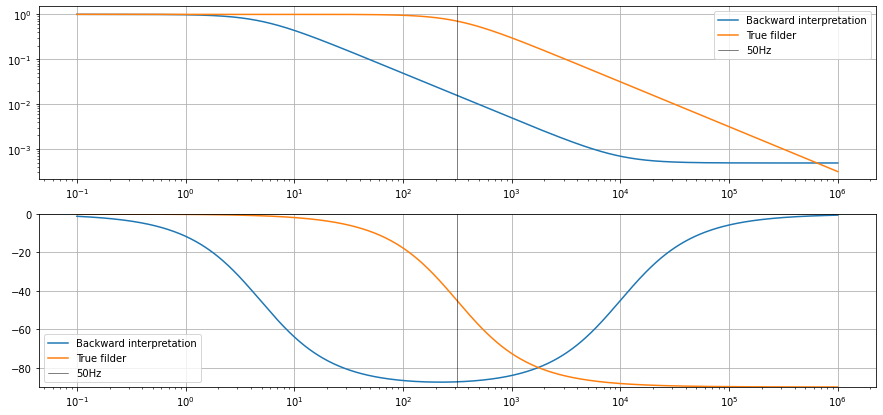

In [65]:
import matplotlib.pyplot as plt
import numpy as np

k = 10
tau = 1/(2*np.pi*50) # tau = 1/omega0 = 1/(2*pi*f3dB)
T = 2*np.pi*tau * 1/(100) # sampling time
c = 1-np.power(2, -k, dtype=float)

omega = np.logspace(start=-1, stop=6, num=1000, base=10)
V     = (1-c)/2 * (2+1j*omega*T) / (1+1j*omega*T-c) 
LP    = 1/(1+1j*omega*tau)

y = np.abs(V)

fig, ax = plt.subplots(2, 1, figsize=(15, 7))

ax[0].plot(omega, y, label="Backward interpretation")
ax[0].plot(omega, np.abs(LP), label="True filder")

ax[0].axvline(x=2*np.pi*50, ymin=0, ymax=1, color="k", lw="0.5", label="50Hz")

ax[0].set_yscale('log')
ax[0].set_xscale('log')

ax[0].grid()
ax[0].legend()


ax[1].plot(omega, np.arctan(np.imag(V)/np.real(V))*180/(np.pi), label="Backward interpretation")
ax[1].plot(omega, np.arctan(np.imag(LP)/np.real(LP))*180/(np.pi), label="True filder")
ax[1].set_xscale('log')
ax[1].set_ylim([-90, 0])
ax[1].axvline(x=2*np.pi*50, ymin=0, ymax=1, color="k", lw="0.5", label="50Hz")
ax[1].legend()
ax[1].grid();


**Remark**: once we simulate the low pass filter a dependence on both the sampling time $T_S$ and the parameter $k = -log_{2}(1-c)$ is introduced. The sampling time is usually fixed so the only parameter left is $k$.

## Additional problems
- Implementation of a sinusoidal oscillator by filtering – possibly with multiple LPFs in cascade – a square waveform.
- Implementation of a notch filter.
- Implementation of a phase-shifter (see Fig. 1 for the analog implementation to simulate).


https://www.youtube.com/watch?v=kbcmLx5qDPk

https://circuitdigest.com/electronic-circuits/simple-square-wave-to-sine-wave-converter